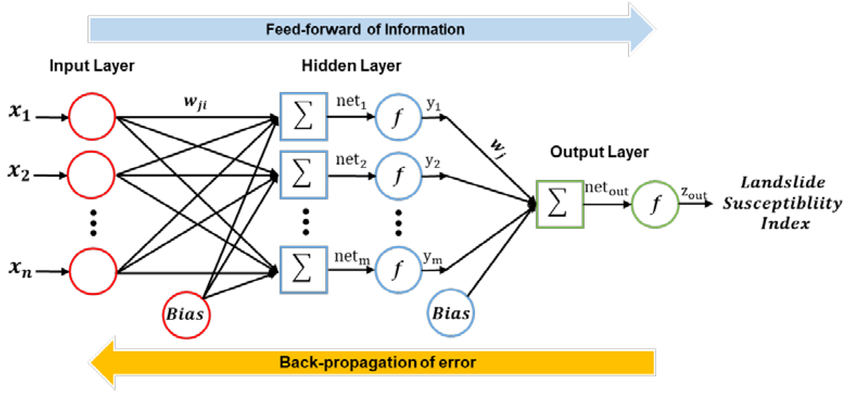

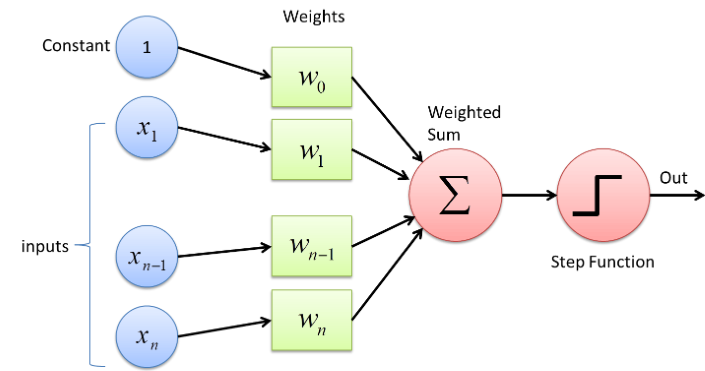

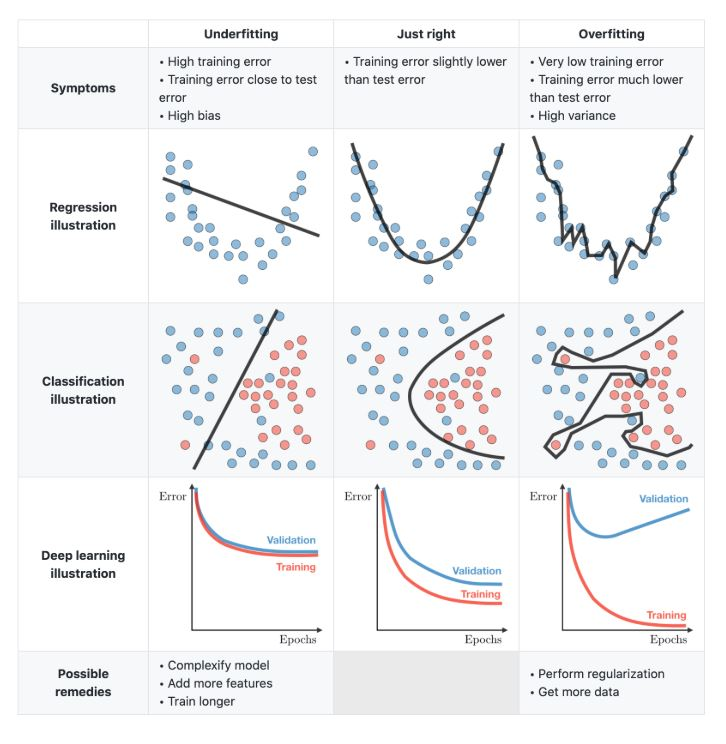

In [213]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [214]:
dataset = pd.read_csv(r"C:\Users\My\Downloads\Churn_Modelling.csv")
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [215]:
input_data = dataset.iloc[:,:-1]
output_data = dataset.iloc[:,-1]

In [216]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [217]:
input_data.shape

(10000, 8)

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [220]:
x_train.shape

(8000, 8)

# ANN = Artificital Nural Netwark 

In [221]:
import tensorflow

In [252]:
from keras.layers import Dense, BatchNormalization,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import L1               # l2,L1L2

In [223]:
ann = Sequential()

## Hidden Layer Create

In [224]:
ann.add(Dense(6,input_dim = 8,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(4,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(2,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(1,activation="sigmoid"))

C:\Users\My\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [250]:
# Normal method
'''
ann.add(Dense(6,input_dim = 8,activation="relu"))
ann.add(Dense(4,activation="relu"))
ann.add(Dense(2,activation="relu"))
ann.add(Dense(1,activation="sigmoid"))

'''

'\nann.add(Dense(6,input_dim = 8,activation="relu"))\nann.add(Dense(4,activation="relu"))\nann.add(Dense(2,activation="relu"))\nann.add(Dense(1,activation="sigmoid"))\n\n'

In [251]:
# Regulaization L1,L2,L1L2 for over fitted data
'''
ann.add(Dense(6,input_dim = 8,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(Dense(4,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(Dense(2,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(Dense(1,activation="sigmoid"))

'''

'\nann.add(Dense(6,input_dim = 8,activation="relu",kernel_regularizer=L1(l1=0.01)))\nann.add(Dense(4,activation="relu",kernel_regularizer=L1(l1=0.01)))\nann.add(Dense(2,activation="relu",kernel_regularizer=L1(l1=0.01)))\nann.add(Dense(1,activation="sigmoid"))\n\n'

In [248]:
# DropOut method for over fitted data
'''
ann.add(Dense(6,input_dim = 8,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(Dropout(0.5))
ann.add(Dense(4,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(Dropout(0.5))
ann.add(Dense(2,activation="relu",kernel_regularizer=L1(l1=0.01)))
ann.add(Dropout(0.5))
ann.add(Dense(1,activation="sigmoid")) 

'''

'\nann.add(Dense(6,input_dim = 8,activation="relu",kernel_regularizer=L1(l1=0.01)))\nann.add(Dropout(0.5))\nann.add(Dense(4,activation="relu",kernel_regularizer=L1(l1=0.01)))\nann.add(Dropout(0.5))\nann.add(Dense(2,activation="relu",kernel_regularizer=L1(l1=0.01)))\nann.add(Dropout(0.5))\nann.add(Dense(1,activation="sigmoid")) \n\n'

In [225]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [226]:
ann.fit(x_train,y_train, batch_size=100,epochs = 50, validation_data=(x_test,y_test),callbacks=EarlyStopping())    # (batch_size) is (x_train.shape) 8000 theke 100 data pick   # epochs is number of sample

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5243 - loss: 1.0625 - val_accuracy: 0.5605 - val_loss: 0.9326
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5682 - loss: 0.9236 - val_accuracy: 0.6130 - val_loss: 0.8775
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6295 - loss: 0.8323 - val_accuracy: 0.6950 - val_loss: 0.8027
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6992 - loss: 0.7559 - val_accuracy: 0.7500 - val_loss: 0.7260
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7429 - loss: 0.6960 - val_accuracy: 0.7980 - val_loss: 0.6655
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7907 - loss: 0.6369 - val_accuracy: 0.8165 - val_loss: 0.6159
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8065 - loss: 0.5957 - val_accuracy: 0.8205 - val_loss: 0.5787
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8128 - loss: 0.5718 - val_accuracy: 0.8295 - val_loss:

In [230]:
train_acuracy = ann.history.history["accuracy"]
test_acurecy = ann.history.history["val_accuracy"]

In [231]:
import matplotlib.pyplot as plt

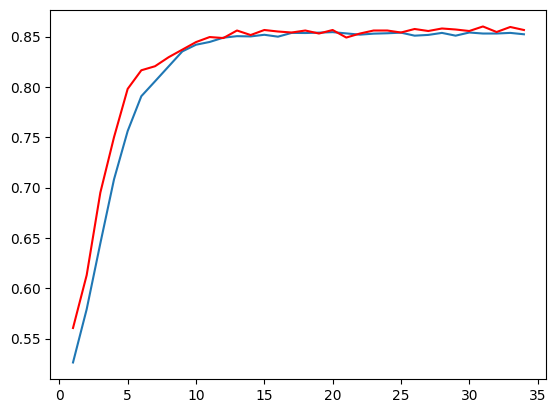

In [232]:
plt.plot([i for i in range(1,35)],train_acuracy)
plt.plot([i for i in range(1,35)],test_acurecy,c="red")
plt.show()

## Predict accuracy

In [233]:
prd = ann.predict(x_test)
prd

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.06730257],
       [0.04675119],
       [0.09319998],
       ...,
       [0.63042927],
       [0.18664552],
       [0.22655092]], dtype=float32)

In [234]:
prd1 = ann.predict(x_train)
prd1

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.03197962],
       [0.11817396],
       [0.12498339],
       ...,
       [0.68304867],
       [0.4160102 ],
       [0.566555  ]], dtype=float32)

In [235]:
prd_data = []
for i in prd:
    if i[0] > 0.5 :
        prd_data.append(1)
    else :
        prd_data.append(0)

In [236]:
prd_data1 = []
for i in prd1:
    if i[0] > 0.5 :
        prd_data1.append(1)
    else :
        prd_data1.append(0)

In [237]:
prd_data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [238]:
from sklearn.metrics import accuracy_score

In [239]:
accuracy_score(y_test,prd_data)*100

85.65

In [240]:
accuracy_score(y_train,prd_data1)*100

85.675

## If new data include

In [241]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524
...,...,...,...,...,...,...,...,...
6412,-0.502117,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298
8285,-0.429689,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498
7853,0.822271,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142
1095,0.429093,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759


In [242]:
import numpy as np

# Convert your list to a NumPy array with correct shape
input_data = np.array([[-0.564197, -0.660018, -0.695982, 0.324119, 
                       0.807737, -1.547768, -1.030670, -1.013811]])

# Make sure the shape matches what your model expects
print(input_data.shape)  # Should be (1, 8) for single sample with 8 features

# Now predict
prd2 = ann.predict(input_data)

(1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


### Predicted Output

In [243]:
prd_data2 = []
for i in prd2:
    if i[0] > 0.5 :
        prd_data2.append(1)
    else :
        prd_data2.append(0)
prd_data2

[0]

### Original Output

In [244]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64